In [702]:
import pandas as pd
import numpy as np
import re
import csv

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


In [703]:
state_set = {"Alabama", "Alaska", "American Samoa", "Arizona", "Arkansas", "California", "Colorado", "Connecticut",
            "Delaware", "District of Columbia", "Florida", "Georgia", "Guam", "Hawaii", "Idaho", "Illinois",
            "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts",
            "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
            "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota",
            "Northern Mariana Islands", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", 
            "Rhode Island", "South Carolina",
            "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington",
            "West Virginia", "Wisconsin", "Wyoming",  
            "U.S. Virgin Islands"}



In [704]:
# check each row to verify the state is valid.  Remove all leading and trailing spaces
# from the state value.  If the state is not valid, drop the row from the dataframe.
# **Important - This funcion requires the passed in dataframe to have the column "State".
def isValidState(dataframe):
    not_state_list = []
    for index, state in zip(dataframe.index, dataframe["State"]) :
        print(state)
        if state.strip() in state_set :
            print("In List")
            dataframe["State"][index] = state.strip()
        else :
            print("Not in List")
            not_state_list.append(index)
    print(not_state_list)
    dataframe.drop(not_state_list, inplace=True)
    return not_state_list

In [ ]:
edu_df = pd.read_csv("~/OneDrive/Documents/manning live projects/Life Expectancy/education.csv", skiprows=1, delimiter=";")

In [706]:
edu_df.head()
edu_df.describe()

,High School rank,Bachelor's rank,Advanced rank
count,52.000000,52.000000,52.000000
mean,26.182692,25.894231,25.836538
std,14.778438,14.739349,14.755431
min,1.000000,1.000000,1.000000
25%,13.750000,13.750000,13.750000
50%,26.500000,25.500000,25.500000
75%,38.250000,38.250000,38.250000
max,51.000000,51.000000,51.000000


In [707]:
for col in edu_df.columns :
        if str(col).find("rank") > 0:
            edu_df.drop(col, inplace=True, axis=1)

In [708]:
edu_df.dtypes

State,\nfederal district,\nor territory    object
% High school graduate\nor higher          object
% Bachelor's degree\nor higher             object
% Advanced degree                          object
dtype: object

In [709]:
# check for null values
edu_df.isnull().sum()

State,\nfederal district,\nor territory    0
% High school graduate\nor higher          0
% Bachelor's degree\nor higher             0
% Advanced degree                          0
dtype: int64

In [710]:
edu_df.columns

Index(['State,\nfederal district,\nor territory',
       '% High school graduate\nor higher', '% Bachelor's degree\nor higher',
       '% Advanced degree'],
      dtype='object')

In [711]:
#convert columns that start with a % from an object to a float
for col in edu_df.columns :
    if col.startswith("%") :
        edu_df[col] = (edu_df[col].str[:-1].astype(float))
        edu_df[col] = edu_df[col].apply(pd.to_numeric, downcast='float', errors='coerce')

In [712]:
edu_df.head(12)

,"State,\nfederal district,\nor territory",% High school graduate\nor higher,% Bachelor's degree\nor higher,% Advanced degree
0,Montana,93.0,30.7,10.1
1,New Hampshire,92.8,36.0,13.8
2,Minnesota,92.8,34.8,11.8
3,Wyoming,92.8,26.7,9.3
4,Alaska,92.4,29.0,10.4
5,North Dakota,92.3,28.9,7.8
6,Vermont,92.3,36.8,15.0
7,Maine,92.1,30.3,10.9
8,Iowa,91.8,27.7,9.0
9,Utah,91.8,32.5,11.0


In [713]:
#rename the columns as they are too wordy
edu_df.rename(
  columns={
    "State,\nfederal district,\nor territory" : 'State',
    "% High school graduate\nor higher" : "hs_grad_or_higher",
    "% Bachelor's degree\nor higher" : "bs_degree_or_higher",
    "% Advanced degree" : "adv_degree"
  },
  inplace=True
)

In [714]:
edu_df.set_index("State")

,hs_grad_or_higher,bs_degree_or_higher,adv_degree
State,,,
Montana,93.0,30.7,10.1
New Hampshire,92.8,36.0,13.8
Minnesota,92.8,34.8,11.8
Wyoming,92.8,26.7,9.3
Alaska,92.4,29.0,10.4
North Dakota,92.3,28.9,7.8
Vermont,92.3,36.8,15.0
Maine,92.1,30.3,10.9
Iowa,91.8,27.7,9.0


In [715]:
edu_df.sort_values(by = 'State', inplace = True)
edu_df

,State,hs_grad_or_higher,bs_degree_or_higher,adv_degree
39,Georgia,86.3,29.9,11.4
40,New York,86.1,35.3,15.4
15,Washington,90.8,34.5,12.7
44,Alabama,85.3,24.5,9.1
4,Alaska,92.4,29.0,10.4
51,Arizona,82.1,28.4,10.7
43,Arkansas,85.6,22.0,7.9
50,California,82.5,32.6,12.2
13,Colorado,91.1,39.4,14.6
21,Connecticut,90.2,38.4,17.0


In [716]:
# check each row to verify the state is valid.  If it is not, drop the row.
not_state_list = isValidState(edu_df)
print("indexes dropped are: ",not_state_list)
edu_df.describe()

 Georgia
In List
 New York
In List
 Washington
In List
 Alabama
In List
 Alaska
In List
 Arizona
In List
 Arkansas
In List
 California
In List
 Colorado
In List
 Connecticut
In List
 Delaware
In List
 District of Columbia
In List
 Florida
In List
 Hawaii
In List
 Idaho
In List
 Illinois
In List
 Indiana
In List
 Iowa
In List
 Kansas
In List
 Kentucky
In List
 Louisiana
In List
 Maine
In List
 Maryland
In List
 Massachusetts
In List
 Michigan
In List
 Minnesota
In List
 Mississippi
In List
 Missouri
In List
 Montana
In List
 Nebraska
In List
 Nevada
In List
 New Hampshire
In List
 New Jersey
In List
 New Mexico
In List
 North Carolina
In List
 North Dakota
In List
 Ohio
In List
 Oklahoma
In List
 Oregon
In List
 Pennsylvania
In List
 Rhode Island
In List
 South Carolina
In List
 South Dakota
In List
 Tennessee
In List
 Texas
In List
 United States
Not in List
 Utah
In List
 Vermont
In List
 Virginia
In List
 West Virginia
In List
 Wisconsin
In List
 Wyoming
In List
[35]
indexes dropped 

<ipython-input-704-9a37d4b890b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["State"][index] = state.strip()


,hs_grad_or_higher,bs_degree_or_higher,adv_degree
count,51.000000,51.000000,51.000000
mean,88.543137,30.633333,11.684314
std,3.462730,6.229917,4.031941
min,76.700000,19.900000,7.800000
25%,86.200000,26.950000,9.450000
50%,89.300000,29.900000,10.700000
75%,91.250000,33.200000,12.800000
max,93.000000,56.600000,32.800000


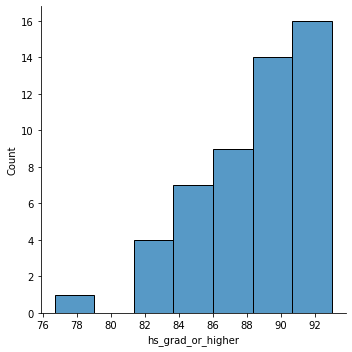

In [717]:
sns.displot(edu_df['hs_grad_or_higher'], kde=False)

In [718]:
edu_df.describe()

,hs_grad_or_higher,bs_degree_or_higher,adv_degree
count,51.000000,51.000000,51.000000
mean,88.543137,30.633333,11.684314
std,3.462730,6.229917,4.031941
min,76.700000,19.900000,7.800000
25%,86.200000,26.950000,9.450000
50%,89.300000,29.900000,10.700000
75%,91.250000,33.200000,12.800000
max,93.000000,56.600000,32.800000


In [719]:
#check for duplicate rows
dupRows_df = edu_df[edu_df.index.duplicated()]
dupRows_df.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: [State, hs_grad_or_higher, bs_degree_or_higher, adv_degree]
Index: []>

In [720]:
edu_df_clean = edu_df
filename = "~/OneDrive/Documents/manning live projects/Life Expectancy/edu_df_clean.csv"
edu_df_clean.to_csv(filename, index=False)

In [723]:
life_exp_df = pd.read_csv("~/OneDrive/Documents/manning live projects/Life Expectancy/life_expectancy.csv", delimiter = ";")

In [724]:
life_exp_df.describe()

,LifeExp2010,MaleLifeExp,FemLifeExp
count,57.000000,57.000000,57.000000
mean,78.419298,76.301754,81.117544
std,1.678162,1.936537,1.873034
min,74.000000,71.900000,77.000000
25%,77.500000,75.300000,80.000000
50%,78.700000,76.700000,81.300000
75%,79.600000,77.600000,82.300000
max,81.400000,79.400000,85.600000


In [725]:
life_exp_df.head()

,State,LifeExp2018,LifeExp2010,MaleLifeExp,FemLifeExp
0,Hawaii,82.3,81.4,79.3,85.3
1,California,81.6,80.6,79.4,83.8
2,Puerto Rico,81.3,78.7,77.6,84.7
3,New York,81.3,80.3,79.0,83.4
4,U.S. Virgin Islands,81.2,79.2,76.3,85.6


In [726]:
# check each row to verify the state is valid.  If it is not, drop the row.
not_state_list = isValidState(life_exp_df)
print("indexes dropped are: ",not_state_list)
life_exp_df.describe()
    

 Hawaii
In List
 California
In List
 Puerto Rico
In List
 New York
In List
 U.S. Virgin Islands
In List
 Minnesota
In List
 Connecticut
In List
 Guam
In List
 Colorado
In List
 Massachusetts
In List
 Washington
In List
 New Jersey
In List
 Florida
In List
 Arizona
In List
 Rhode Island
In List
 North Dakota
In List
 Utah
In List
 Oregon
In List
 Vermont
In List
 Nebraska
In List
 Virginia
In List
 New Hampshire
In List
 Iowa
In List
 Wisconsin
In List
 Illinois
In List
 Idaho
In List
 Texas
In List
 Maryland
In List
 South Dakota
In List
 Wyoming
In List
 Alaska
In List
 Montana
In List
 United States
Not in List
 Maine
In List
 District of Columbia
In List
 Nevada
In List
 Kansas
In List
 Delaware
In List
 Pennsylvania
In List
 New Mexico
In List
 North Carolina
In List
 Michigan
In List
 Georgia
In List
 Missouri
In List
 South Carolina
In List
 Indiana
In List
 Ohio
In List
 Northern Mariana Islands
In List
 Louisiana
In List
 Oklahoma
In List
 Tennessee
In List
 Arkansas
In List
 A

<ipython-input-704-9a37d4b890b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["State"][index] = state.strip()


,LifeExp2010,MaleLifeExp,FemLifeExp
count,56.000000,56.000000,56.000000
mean,78.414286,76.303571,81.116071
std,1.692919,1.954014,1.889952
min,74.000000,71.900000,77.000000
25%,77.475000,75.200000,79.950000
50%,78.650000,76.750000,81.350000
75%,79.625000,77.600000,82.325000
max,81.400000,79.400000,85.600000


In [727]:
life_exp_df.set_index("State")

,LifeExp2018,LifeExp2010,MaleLifeExp,FemLifeExp
State,,,,
Hawaii,82.3,81.4,79.3,85.3
California,81.6,80.6,79.4,83.8
Puerto Rico,81.3,78.7,77.6,84.7
New York,81.3,80.3,79.0,83.4
U.S. Virgin Islands,81.2,79.2,76.3,85.6
Minnesota,81.0,80.8,79.0,83.0
Connecticut,80.9,80.7,78.7,83.0
Guam,80.7,78.2,77.6,83.8
Colorado,80.5,80.1,78.5,82.5


In [728]:
life_exp_df.isnull().sum()

State          0
LifeExp2018    0
LifeExp2010    0
MaleLifeExp    0
FemLifeExp     0
dtype: int64

In [729]:
dupRows_df = life_exp_df[life_exp_df.duplicated()]
dupRows_df.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: [State, LifeExp2018, LifeExp2010, MaleLifeExp, FemLifeExp]
Index: []>

In [730]:
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

In [731]:
#if a row has an invalid float value for column 'LifeExp2018', then drop the row.
invalid_indexes = []
for index, value in zip(life_exp_df.index, life_exp_df['LifeExp2018']) :
    if isfloat(value) == False :
        invalid_indexes.append(index)     
print(invalid_indexes)
life_exp_df.drop(invalid_indexes, inplace=True)


[]


In [732]:
life_exp_df.dtypes

State           object
LifeExp2018     object
LifeExp2010    float64
MaleLifeExp    float64
FemLifeExp     float64
dtype: object

In [733]:
#convert column LifeExp2018 from data type object to data type float
life_exp_df['LifeExp2018'] = life_exp_df['LifeExp2018'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [734]:
life_exp_df.dtypes


State           object
LifeExp2018    float64
LifeExp2010    float64
MaleLifeExp    float64
FemLifeExp     float64
dtype: object

In [735]:
life_exp_df.describe()

,LifeExp2018,LifeExp2010,MaleLifeExp,FemLifeExp
count,56.000000,56.000000,56.000000,56.000000
mean,78.712501,78.414286,76.303571,81.116071
std,1.888439,1.692919,1.954014,1.889952
min,74.800003,74.000000,71.900000,77.000000
25%,77.675003,77.475000,75.200000,79.950000
50%,79.099998,78.650000,76.750000,81.350000
75%,79.900002,79.625000,77.600000,82.325000
max,82.300003,81.400000,79.400000,85.600000


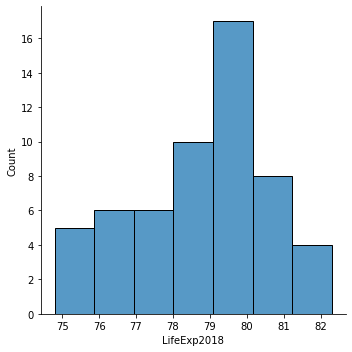

In [736]:
sns.displot(life_exp_df['LifeExp2018'], kde=False)

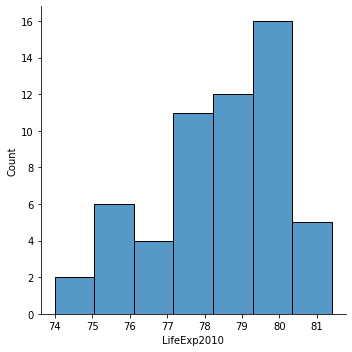

In [737]:
sns.displot(life_exp_df['LifeExp2010'], kde=False)

In [738]:
life_exp_df.sort_values(by = 'State', inplace = True)
life_exp_df.head(10)

,State,LifeExp2018,LifeExp2010,MaleLifeExp,FemLifeExp
52,Alabama,75.400002,75.4,72.6,78.1
30,Alaska,78.800003,78.0,76.7,81.2
55,American Samoa,74.800003,74.0,73.0,77.0
13,Arizona,79.900002,79.3,77.5,82.3
51,Arkansas,75.900002,76.0,73.1,78.6
1,California,81.599998,80.6,79.4,83.8
8,Colorado,80.500000,80.1,78.5,82.5
6,Connecticut,80.900002,80.7,78.7,83.0
37,Delaware,78.400002,78.3,76.2,80.6
34,District of Columbia,78.599998,76.5,75.7,81.3


In [739]:
life_exp_df_clean = life_exp_df
filename = "~/OneDrive/Documents/manning live projects/Life Expectancy/life_exp_df_clean.csv"
life_exp_df_clean.to_csv(filename, index=False)

In [747]:
income_df = pd.read_excel("~/OneDrive/Documents/manning live projects/Life Expectancy/income.xlsx", skiprows = 1)

In [748]:
income_df.head()

,Rank,State,Income2017,Income2016,Income2015,Income2014,Income2013,Income2012,Income2011,Income2010,Income2009,Income2008,Income2007
0,1,District of Columbia,82336,75506,75628,71648,67572,65246,66583,63124,59290,57936,54317
1,2,Maryland,80776,78945,75847,73971,72483,71836,70004,68854,69272,70545,68080
2,3,New Jersey,80088,76126,72222,72919,70165,69667,67458,67681,68342,70373,67035
3,4,Hawaii,77765,74511,73486,69592,68020,66259,61821,63030,64098,67214,63746
4,5,Massachusetts,77385,75297,70628,69160,66768,65339,62859,62072,64081,65401,62365


In [749]:
income_df.drop("Rank", axis=1, inplace=True)

In [750]:
income_df.describe()

,Income2017,Income2016,Income2015,Income2014,Income2013,Income2012,Income2011,Income2010,Income2009,Income2008,Income2007
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,60241.941176,58173.764706,56413.686275,54544.980392,53149.843137,51865.882353,51033.215686,50083.392157,50389.176471,52123.215686,50236.509804
std,10251.153799,9777.930293,9505.139543,9175.886243,8870.503227,8644.757185,8464.674615,8222.187544,8523.817130,8518.196937,8078.413254
min,43469.000000,41754.000000,40593.000000,39680.000000,37963.000000,37095.000000,36919.000000,36851.000000,36538.000000,37790.000000,36338.000000
25%,53069.000000,51303.000000,49467.500000,47695.000000,46857.000000,45235.500000,44260.500000,43895.500000,44736.000000,46290.500000,44100.500000
50%,58570.000000,56565.000000,54736.000000,52622.000000,51440.000000,50723.000000,49392.000000,48615.000000,48408.000000,50177.000000,48576.000000
75%,68373.000000,65642.000000,63200.000000,61112.500000,58787.500000,56907.000000,56578.500000,55101.500000,55523.000000,57140.500000,55085.500000
max,82336.000000,78945.000000,75847.000000,73971.000000,72483.000000,71836.000000,70004.000000,68854.000000,69272.000000,70545.000000,68080.000000


In [751]:
# check each row to verify the state is valid.  If it is not, drop the row.
not_state_list = isValidState(income_df)
print("indexes dropped are: ",not_state_list)
income_df.describe()

District of Columbia
In List
Maryland
In List
New Jersey
In List
Hawaii
In List
Massachusetts
In List
Connecticut
In List
New Hampshire
In List
Alaska
In List
California
In List
Virginia
In List
Washington
In List
Colorado
In List
Minnesota
In List
Utah
In List
New York
In List
Rhode Island
In List
Illinois
In List
Delaware
In List
North Dakota
In List
Wyoming
In List
Oregon
In List
Nebraska
In List
Wisconsin
In List
Texas
In List
Pennsylvania
In List
Iowa
In List
Nevada
In List
Vermont
In List
Arizona
In List
South Dakota
In List
Kansas
In List
Maine
In List
Georgia
In List
Michigan
In List
Indiana
In List
Ohio
In List
Missouri
In List
Montana
In List
North Carolina
In List
Florida
In List
Idaho
In List
Tennessee
In List
South Carolina
In List
Oklahoma
In List
Kentucky
In List
Alabama
In List
New Mexico
In List
Louisiana
In List
Arkansas
In List
Mississippi
In List
West Virginia
In List
[]
indexes dropped are:  []


<ipython-input-704-9a37d4b890b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["State"][index] = state.strip()


,Income2017,Income2016,Income2015,Income2014,Income2013,Income2012,Income2011,Income2010,Income2009,Income2008,Income2007
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,60241.941176,58173.764706,56413.686275,54544.980392,53149.843137,51865.882353,51033.215686,50083.392157,50389.176471,52123.215686,50236.509804
std,10251.153799,9777.930293,9505.139543,9175.886243,8870.503227,8644.757185,8464.674615,8222.187544,8523.817130,8518.196937,8078.413254
min,43469.000000,41754.000000,40593.000000,39680.000000,37963.000000,37095.000000,36919.000000,36851.000000,36538.000000,37790.000000,36338.000000
25%,53069.000000,51303.000000,49467.500000,47695.000000,46857.000000,45235.500000,44260.500000,43895.500000,44736.000000,46290.500000,44100.500000
50%,58570.000000,56565.000000,54736.000000,52622.000000,51440.000000,50723.000000,49392.000000,48615.000000,48408.000000,50177.000000,48576.000000
75%,68373.000000,65642.000000,63200.000000,61112.500000,58787.500000,56907.000000,56578.500000,55101.500000,55523.000000,57140.500000,55085.500000
max,82336.000000,78945.000000,75847.000000,73971.000000,72483.000000,71836.000000,70004.000000,68854.000000,69272.000000,70545.000000,68080.000000


In [752]:
income_df.set_index('State')

,Income2017,Income2016,Income2015,Income2014,Income2013,Income2012,Income2011,Income2010,Income2009,Income2008,Income2007
State,,,,,,,,,,,
District of Columbia,82336,75506,75628,71648,67572,65246,66583,63124,59290,57936,54317
Maryland,80776,78945,75847,73971,72483,71836,70004,68854,69272,70545,68080
New Jersey,80088,76126,72222,72919,70165,69667,67458,67681,68342,70373,67035
Hawaii,77765,74511,73486,69592,68020,66259,61821,63030,64098,67214,63746
Massachusetts,77385,75297,70628,69160,66768,65339,62859,62072,64081,65401,62365
Connecticut,74168,73433,71346,70048,67098,67276,65753,64032,67034,68595,65967
New Hampshire,73381,70936,70303,66532,64230,63280,62647,61042,60567,63731,62369
Alaska,73181,76440,73355,71583,72237,67712,67825,64576,66953,68460,64333
California,71805,67739,64500,61933,60190,58328,57287,57708,58931,61021,59948


In [753]:
income_df.isnull().sum()

State         0
Income2017    0
Income2016    0
Income2015    0
Income2014    0
Income2013    0
Income2012    0
Income2011    0
Income2010    0
Income2009    0
Income2008    0
Income2007    0
dtype: int64

In [754]:
income_df.dtypes

State         object
Income2017     int64
Income2016     int64
Income2015     int64
Income2014     int64
Income2013     int64
Income2012     int64
Income2011     int64
Income2010     int64
Income2009     int64
Income2008     int64
Income2007     int64
dtype: object

In [755]:
dupRows_df = income_df[income_df.duplicated()]
dupRows_df.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: [State, Income2017, Income2016, Income2015, Income2014, Income2013, Income2012, Income2011, Income2010, Income2009, Income2008, Income2007]
Index: []>

In [756]:
income_df.describe()

,Income2017,Income2016,Income2015,Income2014,Income2013,Income2012,Income2011,Income2010,Income2009,Income2008,Income2007
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,60241.941176,58173.764706,56413.686275,54544.980392,53149.843137,51865.882353,51033.215686,50083.392157,50389.176471,52123.215686,50236.509804
std,10251.153799,9777.930293,9505.139543,9175.886243,8870.503227,8644.757185,8464.674615,8222.187544,8523.817130,8518.196937,8078.413254
min,43469.000000,41754.000000,40593.000000,39680.000000,37963.000000,37095.000000,36919.000000,36851.000000,36538.000000,37790.000000,36338.000000
25%,53069.000000,51303.000000,49467.500000,47695.000000,46857.000000,45235.500000,44260.500000,43895.500000,44736.000000,46290.500000,44100.500000
50%,58570.000000,56565.000000,54736.000000,52622.000000,51440.000000,50723.000000,49392.000000,48615.000000,48408.000000,50177.000000,48576.000000
75%,68373.000000,65642.000000,63200.000000,61112.500000,58787.500000,56907.000000,56578.500000,55101.500000,55523.000000,57140.500000,55085.500000
max,82336.000000,78945.000000,75847.000000,73971.000000,72483.000000,71836.000000,70004.000000,68854.000000,69272.000000,70545.000000,68080.000000


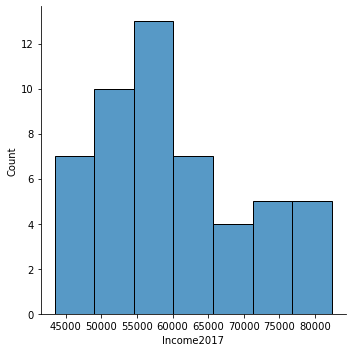

In [757]:
sns.displot(income_df['Income2017'], kde=False)

In [758]:
income_df.sort_values(by = 'State', inplace = True)
income_df.head(10)

,State,Income2017,Income2016,Income2015,Income2014,Income2013,Income2012,Income2011,Income2010,Income2009,Income2008,Income2007
45,Alabama,48123,46257,44765,42830,42849,41574,41415,40474,40489,42666,40554
7,Alaska,73181,76440,73355,71583,72237,67712,67825,64576,66953,68460,64333
28,Arizona,56581,53558,51492,50068,48510,47826,46709,46789,48745,50958,49889
48,Arkansas,45869,45907,42798,44922,39376,39018,41302,38587,36538,39586,38134
8,California,71805,67739,64500,61933,60190,58328,57287,57708,58931,61021,59948
11,Colorado,69117,65685,63909,61303,58823,56765,55387,54046,55430,56993,55212
5,Connecticut,74168,73433,71346,70048,67098,67276,65753,64032,67034,68595,65967
17,Delaware,62852,61757,61255,59716,57846,54554,58814,55847,56860,57989,54610
0,District of Columbia,82336,75506,75628,71648,67572,65246,66583,63124,59290,57936,54317
39,Florida,52594,50860,49426,47463,46036,45040,44299,44409,44736,47778,47804


In [759]:
income_df_clean = income_df
filename = "~/OneDrive/Documents/manning live projects/Life Expectancy/income_df_clean.csv"
income_df_clean.to_csv(filename, index=False)

In [767]:
crime_df = pd.read_csv("~/OneDrive/Documents/manning live projects/Life Expectancy/crime.csv", delimiter=";")

In [768]:
crime_df.head(20)

,State,Population\n(total inhabitants) \n(2015) [2],Murders and\nNonnegligent\nManslaughter\n(total deaths) \n(2015) [1],Murders\n(total deaths) \n(2015) [3],Gun Murders\n(total deaths) \n(2015) [3],Gun\nOwnership\n(%) \n(2013) [4],"Murder and\nNonnegligent\nManslaughter\nRate\n(per 100,000) \n(2015)","Murder Rate\n(per 100,000) \n(2015)","Gun\nMurder Rate\n(per 100,000) \n(2015)"
0,Alabama,"4,853,875",348,—[a],—[a],48.9,7.2,— [a],— [a]
1,Alaska,"737,709",59,57,39,61.7,8.0,7.7,5.3
2,Arizona,"6,817,565",306,278,171,32.3,4.5,4.1,2.5
3,Arkansas,"2,977,853",181,164,110,57.9,6.1,5.5,3.7
4,California,"38,993,940","1,861","1,861","1,275",20.1,4.8,4.8,3.3
5,Colorado,"5,448,819",176,176,115,34.3,3.2,3.2,2.1
6,Connecticut,"3,584,730",117,107,73,16.6,3.3,3.0,2.0
7,Delaware,"944,076",63,63,52,5.2,6.7,6.7,5.5
8,District of Columbia,"670,377",162,162,121,25.9,24.2,24.2,18.0
9,Florida,"20,244,914","1,041",— [b],— [b],32.5,5.1,— [b],— [b]


In [769]:
# check each row to verify the state is valid.  If it is not, drop the row.
not_state_list = isValidState(crime_df)
print("indexes dropped are: ",not_state_list)
print(crime_df)

Alabama
In List
Alaska
In List
Arizona
In List
Arkansas
In List
California
In List
Colorado
In List
Connecticut
In List
Delaware
In List
District of Columbia
In List
Florida
In List
Georgia
In List
Hawaii
In List
Idaho
In List
Illinois
In List
Indiana
In List
Iowa
In List
Kansas
In List
Kentucky
In List
Louisiana
In List
Maine
In List
Maryland
In List
Massachusetts
In List
Michigan
In List
Minnesota
In List
Mississippi
In List
Missouri
In List
Montana
In List
Nebraska
In List
Nevada
In List
New Hampshire
In List
New Jersey
In List
New Mexico
In List
New York
In List
North Carolina
In List
North Dakota
In List
Ohio
In List
Oklahoma
In List
Oregon
In List
Pennsylvania
In List
Rhode Island
In List
South Carolina
In List
South Dakota
In List
Tennessee
In List
Texas
In List
Utah
In List
Vermont
In List
Virginia
In List
Washington
In List
West Virginia
In List
Wisconsin
In List
Wyoming
In List
	
Not in List
^ 
Not in List
Jump up to: 
Not in List
 
Not in List
a
Not in List
 
Not in List
b
N

<ipython-input-704-9a37d4b890b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["State"][index] = state.strip()


In [770]:
crime_df.dtypes

State                                                                    object
Population\n(total inhabitants) \n(2015) [2]                             object
Murders and\nNonnegligent\nManslaughter\n(total deaths) \n(2015) [1]     object
Murders\n(total deaths) \n(2015) [3]                                     object
Gun Murders\n(total deaths) \n(2015) [3]                                 object
Gun\nOwnership\n(%) \n(2013) [4]                                        float64
Murder and\nNonnegligent\nManslaughter\nRate\n(per 100,000) \n(2015)    float64
Murder Rate\n(per 100,000) \n(2015)                                      object
Gun\nMurder Rate\n(per 100,000) \n(2015)                                 object
dtype: object

In [771]:
#rename the columns as they are too wordy and have newline and other annoying chars
crime_df.rename(
  columns={
    "Population\n(total inhabitants) \n(2015) [2]" : 'Population 2015',
    "Murders and\nNonnegligent\nManslaughter\n(total deaths) \n(2015) [1]" : "Murders_NonNeg_Manslaughter 2015",
    "Murders\n(total deaths) \n(2015) [3]" : "Total Murders 2015",
    "Gun Murders\n(total deaths) \n(2015) [3]" : "Total Gun Murders 2015",
    "Gun\nOwnership\n(%) \n(2013) [4]" : "Gun Ownership 2013",
    "Murder and\nNonnegligent\nManslaughter\nRate\n(per 100,000) \n(2015)" : "Rate per 100K Murders_NonNeg_Manslaughter 2015",
    "Murder Rate\n(per 100,000) \n(2015)" : "Rate per 100K Murders 2015",
    "Gun\nMurder Rate\n(per 100,000) \n(2015)" : "Rate per 100K Gun Murders"
  },
  inplace=True
)
crime_df.columns

Index(['State', 'Population 2015', 'Murders_NonNeg_Manslaughter 2015',
       'Total Murders 2015', 'Total Gun Murders 2015', 'Gun Ownership 2013',
       'Rate per 100K Murders_NonNeg_Manslaughter 2015',
       'Rate per 100K Murders 2015', 'Rate per 100K Gun Murders'],
      dtype='object')

In [772]:
#TODO - remove the "[5]"  appended to the end of the population for the state of Illinois
crime_df.iloc[13,1] = crime_df.iloc[13,1].replace("[5]","")
print(crime_df.iloc[13,1])

12,859,995


In [773]:
#For columns that are of type object, convert to type int or float
for col in crime_df.columns[1:5] :
    crime_df[col] = crime_df[col].str.replace(",", "")
    crime_df[col] = crime_df[col].apply(pd.to_numeric, downcast='integer', errors='coerce')
for col in crime_df.columns[7:9] :
    crime_df[col] = crime_df[col].str.replace(",", "")
    crime_df[col] = crime_df[col].apply(pd.to_numeric, downcast='float', errors='coerce') 
print(crime_df.dtypes)

State                                              object
Population 2015                                     int64
Murders_NonNeg_Manslaughter 2015                    int64
Total Murders 2015                                float64
Total Gun Murders 2015                            float64
Gun Ownership 2013                                float64
Rate per 100K Murders_NonNeg_Manslaughter 2015    float64
Rate per 100K Murders 2015                        float64
Rate per 100K Gun Murders                         float64
dtype: object


In [774]:
crime_df.isnull().sum()

State                                             0
Population 2015                                   0
Murders_NonNeg_Manslaughter 2015                  0
Total Murders 2015                                2
Total Gun Murders 2015                            2
Gun Ownership 2013                                0
Rate per 100K Murders_NonNeg_Manslaughter 2015    0
Rate per 100K Murders 2015                        2
Rate per 100K Gun Murders                         2
dtype: int64

In [775]:
dupRows_df = crime_df[crime_df.duplicated()]
dupRows_df.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: [State, Population 2015, Murders_NonNeg_Manslaughter 2015, Total Murders 2015, Total Gun Murders 2015, Gun Ownership 2013, Rate per 100K Murders_NonNeg_Manslaughter 2015, Rate per 100K Murders 2015, Rate per 100K Gun Murders]
Index: []>

In [776]:
crime_df.describe()

,Population 2015,Murders_NonNeg_Manslaughter 2015,Total Murders 2015,Total Gun Murders 2015,Gun Ownership 2013,Rate per 100K Murders_NonNeg_Manslaughter 2015,Rate per 100K Murders 2015,Rate per 100K Gun Murders
count,5.100000e+01,51.000000,49.000000,49.000000,51.000000,51.000000,49.000000,49.000000
mean,6.292493e+06,307.705882,273.693878,195.591837,32.950980,4.954118,4.567347,3.206122
std,7.181993e+06,353.334193,335.083895,239.272066,13.436538,3.497931,3.479666,2.733085
min,5.861070e+05,10.000000,10.000000,4.000000,5.200000,1.100000,1.100000,0.300000
25%,1.746940e+06,62.500000,57.000000,34.000000,26.050000,2.850000,2.700000,1.600000
50%,4.424611e+06,181.000000,164.000000,115.000000,32.200000,4.500000,4.100000,2.900000
75%,6.988928e+06,443.500000,394.000000,297.000000,42.600000,6.000000,5.500000,3.900000
max,3.899394e+07,1861.000000,1861.000000,1275.000000,61.700000,24.200000,24.200001,18.000000


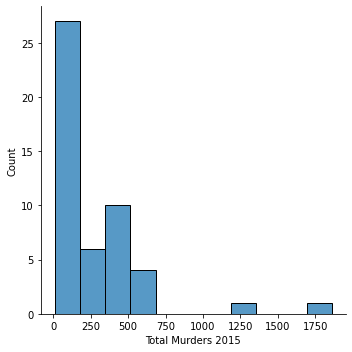

In [777]:
sns.displot(crime_df['Total Murders 2015'], kde=False)

In [778]:
crime_df.isna()

,State,Population 2015,Murders_NonNeg_Manslaughter 2015,Total Murders 2015,Total Gun Murders 2015,Gun Ownership 2013,Rate per 100K Murders_NonNeg_Manslaughter 2015,Rate per 100K Murders 2015,Rate per 100K Gun Murders
0,False,False,False,True,True,False,False,True,True
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,True,True,False,False,True,True


In [779]:
crime_df.sort_values(by = 'State', inplace = True)
crime_df.head(10)

,State,Population 2015,Murders_NonNeg_Manslaughter 2015,Total Murders 2015,Total Gun Murders 2015,Gun Ownership 2013,Rate per 100K Murders_NonNeg_Manslaughter 2015,Rate per 100K Murders 2015,Rate per 100K Gun Murders
0,Alabama,4853875,348,NaN,NaN,48.9,7.2,NaN,NaN
1,Alaska,737709,59,57.0,39.0,61.7,8.0,7.700000,5.3
2,Arizona,6817565,306,278.0,171.0,32.3,4.5,4.100000,2.5
3,Arkansas,2977853,181,164.0,110.0,57.9,6.1,5.500000,3.7
4,California,38993940,1861,1861.0,1275.0,20.1,4.8,4.800000,3.3
5,Colorado,5448819,176,176.0,115.0,34.3,3.2,3.200000,2.1
6,Connecticut,3584730,117,107.0,73.0,16.6,3.3,3.000000,2.0
7,Delaware,944076,63,63.0,52.0,5.2,6.7,6.700000,5.5
8,District of Columbia,670377,162,162.0,121.0,25.9,24.2,24.200001,18.0
9,Florida,20244914,1041,NaN,NaN,32.5,5.1,NaN,NaN


In [780]:
crime_df_clean = crime_df
filename = "~/OneDrive/Documents/manning live projects/Life Expectancy/crime_df_clean.csv"
crime_df_clean.to_csv(filename, index=False)

In [781]:
region_df = pd.read_table("~/OneDrive/Documents/manning live projects/Life Expectancy/region.txt", 
                          delim_whitespace=True)

In [782]:
region_df

,Name,Abb,Region,Division
1,Alabama,AL,South,East South Central
2,Alaska,AK,West,Pacific
3,Arizona,AZ,West,Mountain
4,Arkansas,AR,South,west south central
5,California,CA,West,Pacific
6,Colorado,CO,West,Mountain
7,Connecticut,CT,Northeast,New England
8,Delaware,DE,South,south atlantic
9,Florida,FL,South,South Atlantic
10,Georgia,GA,South,South Atlantic


In [785]:
#rename the "Name" column to "State"
region_df.rename(
  columns={
    "Name" : "State"
  },
  inplace=True
)
region_df.columns

Index(['State', 'Abb', 'Region', 'Division'], dtype='object')

In [786]:
# check each row to verify the state is valid.  If it is not, drop the row.
not_state_list = isValidState(region_df)
print("indexes dropped are: ",not_state_list)
region_df.describe()

Alabama
In List
Alaska
In List
Arizona
In List
Arkansas
In List
California
In List
Colorado
In List
Connecticut
In List
Delaware
In List
Florida
In List
Georgia
In List
Hawaii
In List
Idaho
In List
Illinois
In List
Indiana
In List
Iowa
In List
Kansas
In List
Kentucky
In List
Louisiana
In List
Maine
In List
Maryland
In List
Massachusetts
In List
Michigan
In List
Minnesota
In List
Mississippi
In List
Missouri
In List
Montana
In List
Nebraska
In List
Nevada
In List
New Hampshire
In List
New Jersey
In List
New Mexico
In List
New York
In List
North Carolina
In List
North Dakota
In List
Ohio
In List
Oklahoma
In List
Oregon
In List
Pennsylvania
In List
Rhode Island
In List
South Carolina
In List
South Dakota
In List
Tennessee
In List
Texas
In List
Utah
In List
Vermont
In List
Virginia
In List
Washington
In List
West Virginia
In List
Wisconsin
In List
Wyoming
In List
[]
indexes dropped are:  []


,State,Abb,Region,Division
count,50,50,50,50
unique,50,50,4,11
top,Arkansas,NV,South,Mountain
freq,1,1,16,8


In [787]:
region_df.isnull().sum()

State       0
Abb         0
Region      0
Division    0
dtype: int64

In [788]:
#check for duplicate rows
dupRows_df = region_df[region_df.index.duplicated()]
dupRows_df.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: [State, Abb, Region, Division]
Index: []>

In [789]:
region_df.isna()

,State,Abb,Region,Division
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False
10,False,False,False,False


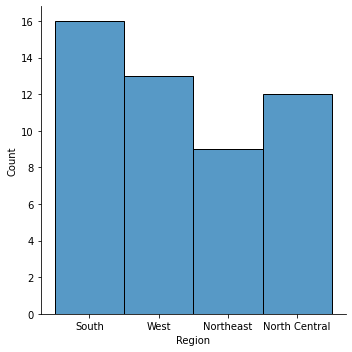

In [790]:
sns.displot(region_df['Region'], kde=False)

In [791]:
region_df.sort_values(by = 'State', inplace = True)
region_df.head(15)

,State,Abb,Region,Division
1,Alabama,AL,South,East South Central
2,Alaska,AK,West,Pacific
3,Arizona,AZ,West,Mountain
4,Arkansas,AR,South,west south central
5,California,CA,West,Pacific
6,Colorado,CO,West,Mountain
7,Connecticut,CT,Northeast,New England
8,Delaware,DE,South,south atlantic
9,Florida,FL,South,South Atlantic
10,Georgia,GA,South,South Atlantic


In [792]:
region_df_clean = region_df
filename = "~/OneDrive/Documents/manning live projects/Life Expectancy/region_df_clean.csv"
region_df_clean.to_csv(filename, header=None, index=None, sep=' ', mode='a')

### area.csv
<h4>Data Description Report</h4>
<table style="width:80%">
<tr>
    <th>Data Description</th>
    <th>Number of Rows</th>
    <th>index column</th>
</tr>
<tr>
    <td>This file contains geographical information about each state</td>
    <td>50 - only the 50 states</td>
    <td>State</td>
</tr>
</table>
<h4>Dataframe Structure</h4>
<table>
<tr>
    <th>Column Name</th>
    <th>Data Type</th>
    <th>Column Description</th>
</tr>
<tr>
    <td>State</td>
    <td>Object</td>
    <td>Name of the state</td>
</tr>
<tr>
    <td>TotalSqMi</td>
    <td>float64</td>
    <td>Total area in square miles</td>
</tr>
<tr>
    <td>TotalKmQ</td>
    <td>int64</td>
    <td>Total area in KmQ</td>
</tr>
<tr>
    <td>LandSqMi</td>
    <td>float64</td>
    <td>land area in SqMi</td>
</tr>
<tr>
    <td>LandKmQ</td>
    <td>int64</td>
    <td>land area in KmQ</td>
</tr>
<tr>
    <td>LandPer</td>
    <td>float64</td>
    <td>land area percentage</td>
</tr>
<tr>
    <td>WaterSqMi</td>
    <td>float64</td>
    <td>water area in SqMi</td>
</tr>
<tr>
    <td>WaterKmQ</td>
    <td>int64</td>
    <td>water area in KmQ</td>
</tr>
<tr>
    <td>WaterPer</td>
    <td>float64</td>
    <td>water area percentage</td>
</tr>
</table>
<h4>Data Quality</h4>
-  No missing values
<br>
-  No duplicate rows
<br>
-  No data type conversion necessary.
<br>
-  No invalid states.


In [796]:
area_df = pd.read_csv("~/OneDrive/Documents/manning live projects/Life Expectancy/area.csv", delimiter=";")

In [797]:
area_df.head(10)

,State,TotalRank,TotalSqMi,TotalKmQ,LandRank,LandSqMi,LandKmQ,LandPer,WaterRank,WaterSqMi,WaterKmQ,WaterPer
0,Alaska,1,665384.04,1723337,1,570640.95,1477953,85.76,1,94743.10,245384,14.24
1,Texas,2,268596.46,695662,2,261231.71,676587,97.26,8,7364.75,19075,2.74
2,California,3,163694.74,423967,3,155779.22,403466,95.16,6,7915.52,20501,4.84
3,Montana,4,147039.71,380831,4,145545.80,376962,98.98,26,1493.91,3869,1.02
4,New Mexico,5,121590.30,314917,5,121298.15,314161,99.76,49,292.15,757,0.24
5,Arizona,6,113990.30,295234,6,113594.08,294207,99.65,48,396.22,1026,0.35
6,Nevada,7,110571.82,286380,7,109781.18,284332,99.28,36,790.65,2048,0.72
7,Colorado,8,104093.67,269601,8,103641.89,268431,99.57,44,451.78,1170,0.43
8,Oregon,9,98378.54,254799,10,95988.01,248608,97.57,20,2390.53,6191,2.43
9,Wyoming,10,97813.01,253335,9,97093.14,251470,99.26,37,719.87,1864,0.74


In [801]:
for col in area_df.columns :
        if str(col).find("Rank") > 0:
            area_df.drop(col, inplace=True, axis=1)

In [802]:
area_df.describe()

,TotalSqMi,TotalKmQ,LandSqMi,LandKmQ,LandPer,WaterSqMi,WaterKmQ,WaterPer
count,50.000000,5.000000e+01,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000
mean,75933.477600,1.966668e+05,70636.887800,1.829487e+05,91.668400,5296.590400,13718.160000,8.331600
std,97327.423173,2.520769e+05,85815.678218,2.222615e+05,10.244987,14256.070622,36923.113729,10.244987
min,1544.890000,4.001000e+03,1033.810000,2.678000e+03,58.460000,191.830000,497.000000,0.240000
25%,37416.612500,9.690850e+04,36741.167500,9.515900e+04,87.222500,705.762500,1828.000000,1.645000
50%,57093.180000,1.478705e+05,53891.280000,1.395775e+05,96.695000,1501.210000,3888.000000,3.305000
75%,84564.897500,2.190222e+05,81225.725000,2.103735e+05,98.355000,4373.040000,11325.750000,12.777500
max,665384.040000,1.723337e+06,570640.950000,1.477953e+06,99.760000,94743.100000,245384.000000,41.540000


In [803]:
area_df.dtypes

State         object
TotalSqMi    float64
TotalKmQ       int64
LandSqMi     float64
LandKmQ        int64
LandPer      float64
WaterSqMi    float64
WaterKmQ       int64
WaterPer     float64
dtype: object

In [804]:
# check each row to verify the state is valid.  If it is not, drop the row.
not_state_list = isValidState(area_df)
print("indexes dropped are: ",not_state_list)

Alaska
In List
Texas
In List
California
In List
Montana
In List
New Mexico
In List
Arizona
In List
Nevada
In List
Colorado
In List
Oregon
In List
Wyoming
In List
Michigan
In List
Minnesota
In List
Utah
In List
Idaho
In List
Kansas
In List
Nebraska
In List
South Dakota
In List
Washington
In List
North Dakota
In List
Oklahoma
In List
Missouri
In List
Florida
In List
Wisconsin
In List
Georgia
In List
Illinois
In List
Iowa
In List
New York
In List
North Carolina
In List
Arkansas
In List
Alabama
In List
Louisiana
In List
Mississippi
In List
Pennsylvania
In List
Ohio
In List
Virginia
In List
Tennessee
In List
Kentucky
In List
Indiana
In List
Maine
In List
South Carolina
In List
West Virginia
In List
Maryland
In List
Hawaii
In List
Massachusetts
In List
Vermont
In List
New Hampshire
In List
New Jersey
In List
Connecticut
In List
Delaware
In List
Rhode Island
In List
[]
indexes dropped are:  []


<ipython-input-704-9a37d4b890b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["State"][index] = state.strip()


In [805]:
area_df.isnull().sum()

State        0
TotalSqMi    0
TotalKmQ     0
LandSqMi     0
LandKmQ      0
LandPer      0
WaterSqMi    0
WaterKmQ     0
WaterPer     0
dtype: int64

In [807]:
#check for duplicate rows
dupRows_df = area_df[area_df.index.duplicated()]
dupRows_df.describe

<bound method NDFrame.describe of Empty DataFrame
Columns: [State, TotalSqMi, TotalKmQ, LandSqMi, LandKmQ, LandPer, WaterSqMi, WaterKmQ, WaterPer]
Index: []>

In [808]:
area_df.isna()

,State,TotalSqMi,TotalKmQ,LandSqMi,LandKmQ,LandPer,WaterSqMi,WaterKmQ,WaterPer
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [809]:
area_df.sort_values(by = 'State', inplace = True)
area_df.head(15)

,State,TotalSqMi,TotalKmQ,LandSqMi,LandKmQ,LandPer,WaterSqMi,WaterKmQ,WaterPer
29,Alabama,52420.07,135767,50645.33,131171,96.61,1774.74,4597,3.39
0,Alaska,665384.04,1723337,570640.95,1477953,85.76,94743.10,245384,14.24
5,Arizona,113990.30,295234,113594.08,294207,99.65,396.22,1026,0.35
28,Arkansas,53178.55,137732,52035.48,134771,97.85,1143.07,2961,2.15
2,California,163694.74,423967,155779.22,403466,95.16,7915.52,20501,4.84
7,Colorado,104093.67,269601,103641.89,268431,99.57,451.78,1170,0.43
47,Connecticut,5543.41,14357,4842.36,12542,87.35,701.06,1816,12.65
48,Delaware,2488.72,6446,1948.54,5047,78.29,540.18,1399,21.71
21,Florida,65757.70,170312,53624.76,138887,81.55,12132.94,31424,18.45
23,Georgia,59425.15,153910,57513.49,148959,96.78,1911.66,4951,3.22


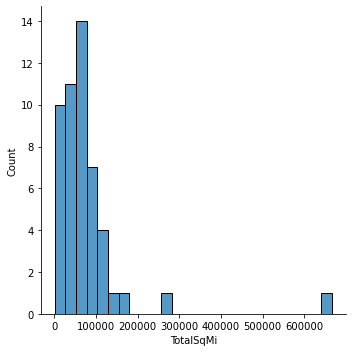

In [810]:
sns.displot(area_df['TotalSqMi'], kde=False)

In [812]:
area_df_clean = area_df
filename = "~/OneDrive/Documents/manning live projects/Life Expectancy/area_df_clean.csv"
area_df_clean.to_csv(filename, index=False)